In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = pd.read_csv('/content/tips (data for regression problem).csv')
data


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
data.shape

(244, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
# Mapping text to numeric
text_to_numeric = {'Male': 1, 'Female': 2}
data['sex'] = data['sex'].map(text_to_numeric)
text_to_numeric1 = {'No': 0, 'Yes': 1}
data['smoker'] = data['smoker'].map(text_to_numeric1)
text_to_numeric2 = {'Sun': 1, 'Thru': 2,'Fri':3,'Sat':4}
data['day'] = data['day'].map(text_to_numeric2)
text_to_numeric3 = {'Lunch': 1, 'Dinner': 2}
data['time'] = data['time'].map(text_to_numeric3)


Correlation Matrix:
            total_bill       tip       sex    smoker       day      time  \
total_bill    1.000000  0.675734 -0.144877  0.085721 -0.060798  0.183118   
tip           0.675734  1.000000 -0.088862  0.005929 -0.093808  0.121629   
sex          -0.144877 -0.088862  1.000000 -0.002816  0.097997 -0.205231   
smoker        0.085721  0.005929 -0.002816  1.000000  0.244083  0.054921   
day          -0.060798 -0.093808  0.097997  0.244083  1.000000 -0.050247   
time          0.183118  0.121629 -0.205231  0.054921 -0.050247  1.000000   
size          0.598315  0.489299 -0.086195 -0.133178 -0.185025  0.103411   

                size  
total_bill  0.598315  
tip         0.489299  
sex        -0.086195  
smoker     -0.133178  
day        -0.185025  
time        0.103411  
size        1.000000  


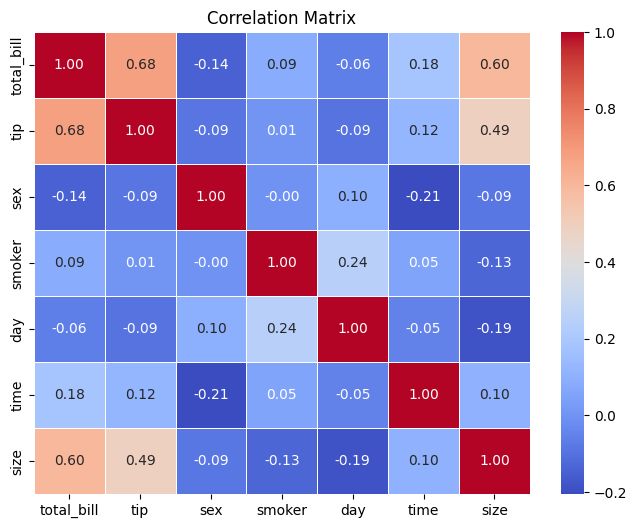

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 'total_bill' is the feature and 'tip' is the target
X = data[['total_bill']].values  # Features
y = data['tip'].values   # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

Linear Regression R2: 0.5449381659234664


In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))


Ridge Regression R2: 0.5449458342338539


In [ ]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))



Lasso Regression R2: 0.545076817885791


In [ ]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))



Decision Tree R2: -0.06898287247700985


In [ ]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))


Random Forest R2: 0.21349875048162892


In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(y_test, y_pred_svr))




SVR R2: 0.5218870832760052


In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))



KNN Regression R2: 0.4545453410143979


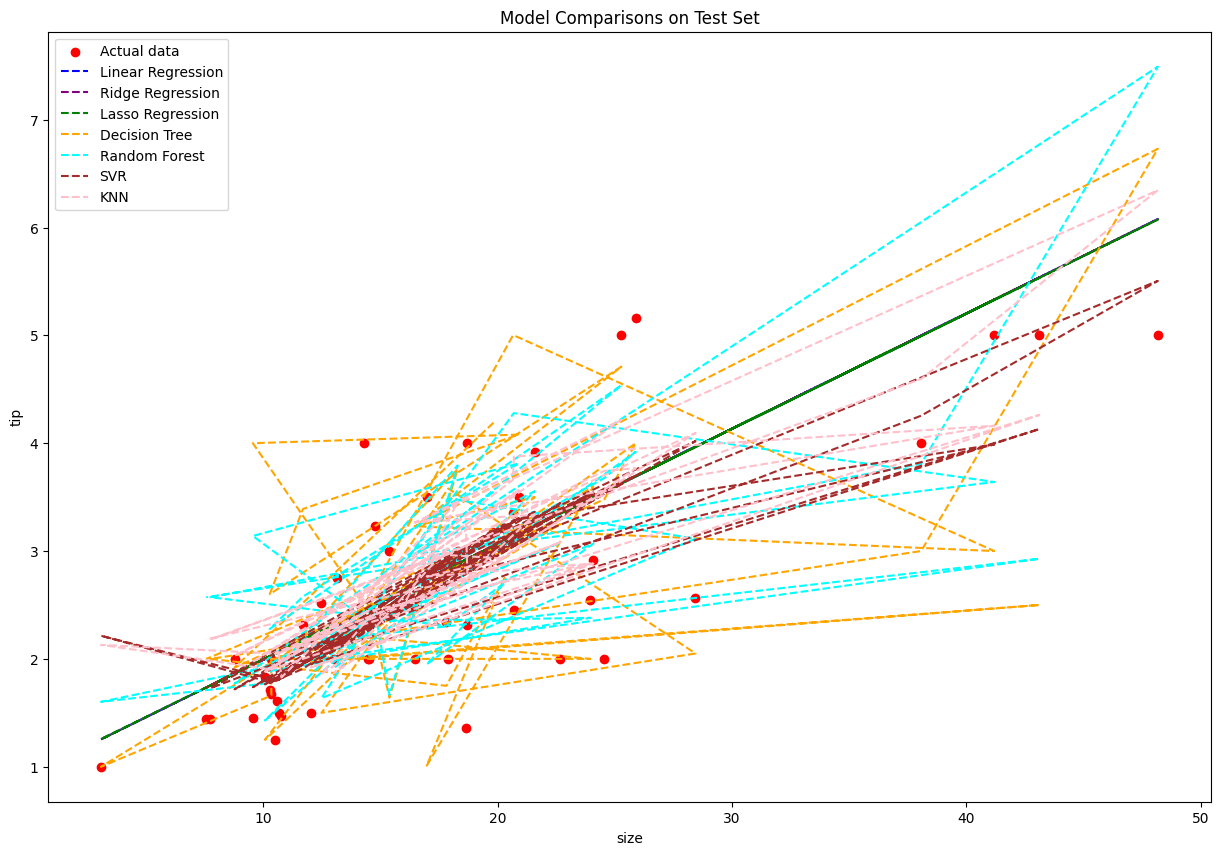

In [ ]:
# Plotting the predictions
plt.figure(figsize=(15, 10))
plt.scatter(X_test, y_test, color='red', label='Actual data')

plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Test Set')
plt.xlabel('size')
plt.ylabel('tip')
plt.legend()
plt.show()



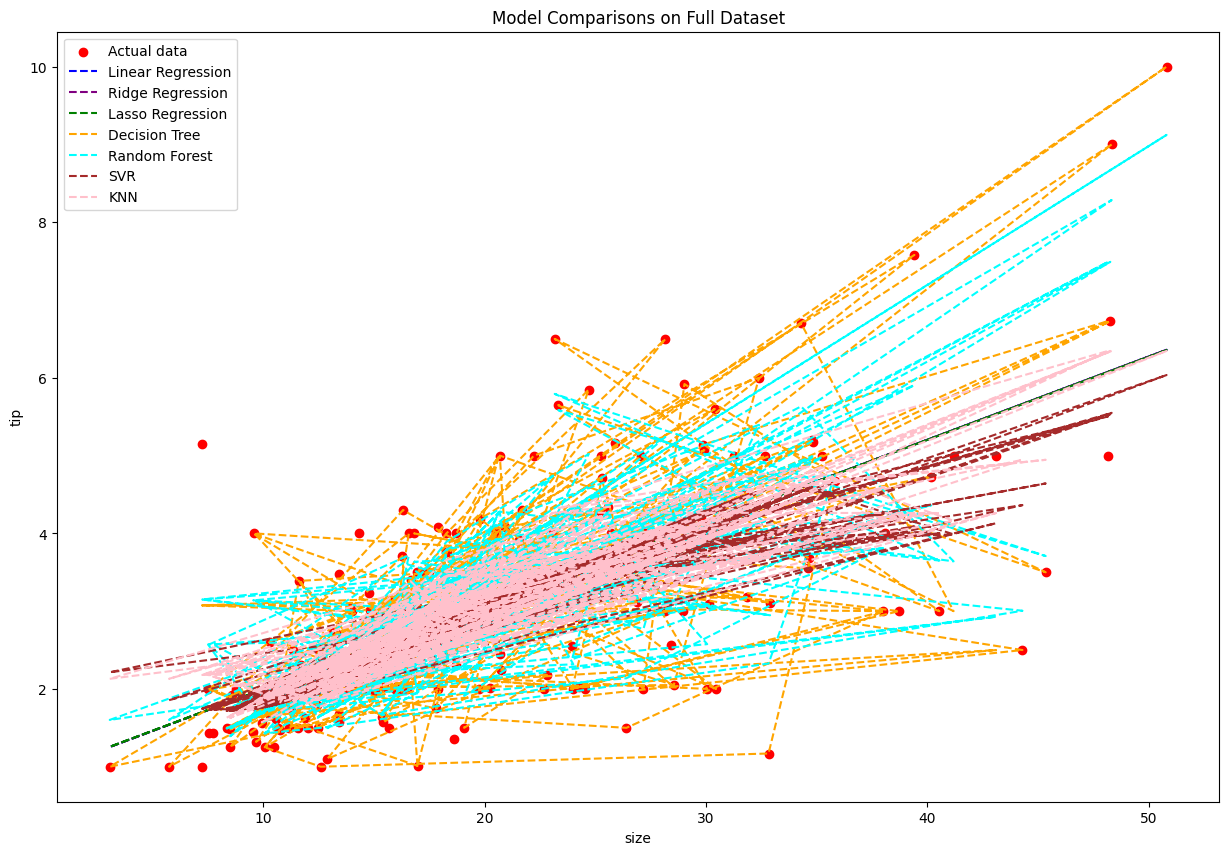

In [ ]:
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train_scaled, y_train_scaled)  # SVR with scaled data
knn_reg.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_linear = linear_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_tree = tree_reg.predict(X)
y_pred_forest = forest_reg.predict(X)

X_scaled = sc_X.transform(X)
y_pred_svr = svr_reg.predict(X_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

y_pred_knn = knn_reg.predict(X)

plt.figure(figsize=(15, 10))
plt.scatter(X, y, color='red', label='Actual data')

# Plot each model's predictions
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X, y_pred_knn, color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Full Dataset')
plt.xlabel('size')
plt.ylabel('tip')
plt.legend()
plt.show()
